In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
statistics = []

for i in range(100):
    df = pd.read_csv('k_from_1_to_9.csv')
    df_filtered = df[(df['k'] >= 1) & (df['k'] <= 4) & (df['t'] == i)]

    X_noisy = df_filtered['x_noisy'].values
    X_exact = df_filtered['x_exact'].values
    k = df_filtered['k'].values

    X_features = np.column_stack([
        X_noisy**2,
        k * X_noisy,
        k**2,
        k,
        X_noisy,
        np.ones_like(X_noisy)
    ])

    model = LinearRegression()
    model.fit(X_features, X_exact)

    regression = []

    for n in range(17):
        m = n + 1
        df = pd.read_csv('k_from_1_to_9.csv')
        df_filtered = df[(df['k'] == m) & (df['t'] == i)]

        X = df_filtered['x_noisy']
        y = df_filtered['x_exact']

        noisy_value = X.mean() if not X.empty else 0
        k_val = m

        X_input = np.array([
            noisy_value**2,
            k_val * noisy_value,
            k_val**2,
            k_val,
            noisy_value,
            1.0
        ]).reshape(1, -1)

        y_pred = model.predict(X_input)[0]
        print(y_pred)
        regression.append(y_pred)

    noisy_value = -3.103226880535198
    k_val = 18
    X_input = np.array([
        noisy_value**2,
        k_val * noisy_value,
        k_val**2,
        k_val,
        noisy_value,
        1.0
    ]).reshape(1, -1)
    y_pred = model.predict(X_input)[0]
    print(y_pred)
    regression.append(y_pred)

    statistics.append(regression)

-3.523050735021343
-3.5223940503694564
-3.5227027806036517
-3.524151161202127
-3.5262890567669842
-3.529596218511756
-3.534502414084983
-3.540422371730415
-3.546615557328579
-3.555522582590129
-3.5658683310657864
-3.5779139740866697
-3.59239527744478
-3.6086725093693417
-3.6271698312791614
-3.6485526786759124
-3.672686044747479
-3.699658248827461
-3.5228126924596097
-3.5225906619439797
-3.5228224695200367
-3.5235673500257576
-3.5246232384611744
-3.5271290506711637
-3.5297067991347717
-3.533672043253347
-3.5377080278233564
-3.5434776981172433
-3.5505252911447656
-3.560439429225852
-3.5708826656521637
-3.584368113805425
-3.5998238044647337
-3.6180354299068824
-3.6389846679907123
-3.662755928932455
-3.5226331322801627
-3.5224509164055746
-3.522566255341701
-3.5233034589495276
-3.5241491917962833
-3.5252891170848955
-3.5277681290116334
-3.530778743840216
-3.533670179969164
-3.539568528961979
-3.545958552367324
-3.553188643314826
-3.563524692529114
-3.5777528235161924
-3.5927680413300607
-3

In [3]:
transposed = list(map(list, zip(*statistics)))
avg = []
for i in range(18):
    average = np.mean(transposed[i])
    avg.append(average)

In [ ]:
df = pd.read_csv('k_from_1_to_9.csv')

avg_noisy = []
avg_exact = []
for i in range(18):
    df_filtered = df[(df['k'] == i)]
    X_noisy = df_filtered['x_noisy'].values
    X_noisy_avg = np.mean(X_noisy)
    avg_noisy.append(X_noisy_avg)
    X_exact = df_filtered['x_exact'].values
    X_exact_avg = np.mean(X_exact)
    avg_exact.append(X_exact_avg)

avg_noisy.append(-3.1032268805351984)
avg_exact.append(-3.712209125939833)

/opt/miniconda3/envs/quantum/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/quantum/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


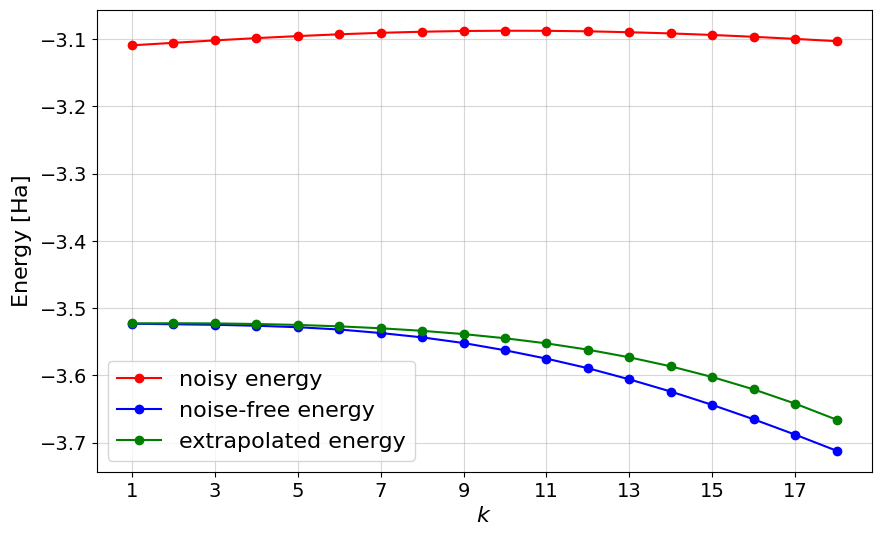

In [ ]:
x_linear = np.arange(0, 19)  # 从 1 到 80
x_others = np.arange(0, 19)  # 从 3 到 80
x_reg = np.arange(1, 19)

plt.figure(figsize=(10, 6))
plt.plot(x_linear, avg_noisy, label='noisy energy', linestyle='-', marker='o', color='r')
plt.plot(x_others, avg_exact, label='noise-free energy', linestyle='-', marker='o', color='b')
plt.plot(x_reg, avg, label='extrapolated energy', linestyle='-', marker='o', color='g')

#plt.plot(x_linear, noisy, label="noisy value")

#plt.ylim(0.17, 0.225)

#plt.title('Absolute Energy Error', fontsize=16)
plt.xlabel(r'$k$', fontsize=16)
plt.ylabel(r'Energy $[\mathrm{Ha}]$', fontsize=16)
plt.legend(fontsize=16)
plt.grid(alpha=0.5)
plt.xticks(range(1, 19, 2),fontsize=14) 
plt.yticks(fontsize=14)

#plt.tight_layout()
plt.show()